In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import re
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [3]:
#Read dataset
train_data = pd.read_csv("./data//train_superset.csv")
test_data = pd.read_csv("./data/test_superset.csv")

In [4]:

pd.options.display.max_columns = None

In [5]:
train_data.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,3,67.0,1600,51,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2545.918367,2598.586572
1,4,85.0,2400,51,0.683672,0.766322,0.476015,0.704576,0,1,6,17,2,6,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
2,6,142.0,1800,51,1.231832,1.208124,0.213468,0.936378,0,0,2,3,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2507.070707,2502.392231
3,5,110.0,2100,51,0.299914,8.571923,0.444347,0.189552,1,1,5,8,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2594.417077,2542.742498
4,5,121.0,2750,51,0.445013,2.188344,0.618813,0.402451,2,3,2,10,2,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2897.785349,2870.273109


In [6]:
test_data.head()

,Id,flat_type,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded,flat_model_3gen
0,0,5,121.0,53,0.820332,0.902017,0.149666,0.739402,0,1,2,7,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2023,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2430.541012,2503.827247,0
1,1,4,100.0,52,0.307784,8.808284,0.143325,0.254920,1,1,5,8,2,3,92942.625,113299,64989,9.957011,11.604281,9.331596,2022,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2594.417077,2542.742498,0
2,2,4,91.0,53,1.097687,0.742112,1.040846,0.497667,0,0,0,4,1,4,104442.375,122110,82001,9.350660,10.057627,8.732712,2023,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2400.679348,2651.027703,0
3,3,3,74.0,51,0.362807,1.070222,1.075530,1.596401,1,1,0,8,0,4,51997.375,64901,40010,14.274470,16.307549,13.912863,2021,8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0
4,4,5,121.0,52,0.448982,0.787797,0.714774,1.461486,1,1,3,5,0,5,79016.000,99010,48889,11.753082,14.020345,10.865200,2022,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0


In [7]:
len(test_data.columns), len(train_data.columns)

(45, 45)

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59477 entries, 0 to 59476
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   flat_type                          59477 non-null  int64  
 1   floor_area_sqm                     59477 non-null  float64
 2   monthly_rent                       59477 non-null  int64  
 3   property_age                       59477 non-null  int64  
 4   nearest_mrt_exist                  59477 non-null  float64
 5   nearest_mrt_planned                59477 non-null  float64
 6   nearest_school                     59477 non-null  float64
 7   nearest_mall                       59477 non-null  float64
 8   mrt_within_0.5_km                  59477 non-null  int64  
 9   mrt_within_1_km                    59477 non-null  int64  
 10  school_within_1_km                 59477 non-null  int64  
 11  school_within_2_km                 59477 non-null  int

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 30000 non-null  int64  
 1   flat_type                          30000 non-null  int64  
 2   floor_area_sqm                     30000 non-null  float64
 3   property_age                       30000 non-null  int64  
 4   nearest_mrt_exist                  30000 non-null  float64
 5   nearest_mrt_planned                30000 non-null  float64
 6   nearest_school                     30000 non-null  float64
 7   nearest_mall                       30000 non-null  float64
 8   mrt_within_0.5_km                  30000 non-null  int64  
 9   mrt_within_1_km                    30000 non-null  int64  
 10  school_within_1_km                 30000 non-null  int64  
 11  school_within_2_km                 30000 non-null  int

In [10]:
# Normalizing the 'year' feature by subtracting the minimum value
# helps linear regression models by scaling the data, making it
# easier for the algorithm to learn patterns and improve accuracy.
min_year = train_data['year'].min()
train_data['year'] = train_data['year'] - min_year
test_data['year'] = test_data['year'] - min_year

In [11]:
train_data.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,3,67.0,1600,51,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5,54951.625,70002,39000,14.986571,17.36298,14.337745,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2545.918367,2598.586572
1,4,85.0,2400,51,0.683672,0.766322,0.476015,0.704576,0,1,6,17,2,6,54951.625,70002,39000,14.986571,17.36298,14.337745,0,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
2,6,142.0,1800,51,1.231832,1.208124,0.213468,0.936378,0,0,2,3,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2507.070707,2502.392231
3,5,110.0,2100,51,0.299914,8.571923,0.444347,0.189552,1,1,5,8,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,0,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2594.417077,2542.742498
4,5,121.0,2750,51,0.445013,2.188344,0.618813,0.402451,2,3,2,10,2,4,54951.625,70002,39000,14.986571,17.36298,14.337745,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2897.785349,2870.273109


In [12]:
#Splitting into train test for further analysis
# train-test 80-20 split
df_train, df_val = train_test_split(train_data,
                                     train_size = 0.8,
                                     test_size = 0.2,
                                     random_state = 100)

In [13]:
df_train.shape, df_val.shape, test_data.shape

((47581, 45), (11896, 45), (30000, 45))

In [14]:
df_train.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
41147,5,121.0,1500,51,0.708492,0.988849,0.159010,0.449148,0,1,5,10,2,6,52199.625,63002,41701,14.152774,16.571078,13.891529,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2312.551440,2642.766006
18711,4,91.0,2600,51,0.406746,0.422217,0.479670,0.331025,2,2,2,5,4,4,50396.750,62100,36134,13.250911,16.250480,12.501900,0,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2821.149144,2651.027703
27074,3,67.0,1700,53,0.998074,0.994500,0.629829,0.931079,0,1,5,10,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2363.131936,2440.906571
12670,5,120.0,2150,51,0.699345,1.500724,0.368022,0.428953,0,1,6,14,2,8,45187.375,51900,35900,12.585338,14.739780,11.920820,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2541.063596,2624.597383
47874,5,115.0,3350,52,1.896037,2.127675,0.298985,0.240401,0,0,2,10,3,6,79016.000,99010,48889,11.753082,14.020345,10.865200,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2605.029586,2624.597383


In [15]:
#Scaling numerical values using Standard Scaler
numerical_columns = ['floor_area_sqm', 'property_age', 'nearest_mrt_exist', 'nearest_mrt_planned', 'nearest_school','nearest_mall', 'mrt_within_0.5_km', 'mrt_within_1_km', 'school_within_1_km', 'school_within_2_km','malls_within_1_km', 'malls_within_2_km','mean_coe', 'max_coe', 'min_coe', 'last_month_mean', 'last_month_max', 'last_month_min' ]
train_numerical_data = df_train[numerical_columns]
val_numerical_data = df_val[numerical_columns]
test_numerical_data = test_data[numerical_columns]




scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_numerical_data)
scaled_val_data = scaler.transform(val_numerical_data)
scaled_test_data = scaler.transform(test_numerical_data)


scaled_train_df = pd.DataFrame(scaled_train_data, columns=numerical_columns)
scaled_val_df = pd.DataFrame(scaled_val_data, columns=numerical_columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=numerical_columns)

scaled_train_df.reset_index(drop = True, inplace=True)
scaled_val_df.reset_index(drop = True, inplace=True)
scaled_test_df.reset_index(drop = True, inplace=True)



df_train = df_train.drop(columns=numerical_columns)
df_val = df_val.drop(columns=numerical_columns)
df_test = test_data.drop(columns=numerical_columns)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)



In [16]:
df_train = pd.concat([scaled_train_df, df_train], axis=1)
df_val = pd.concat([scaled_val_df,df_val ], axis=1)
df_test = pd.concat([scaled_test_df, df_test], axis=1)

In [17]:
df_val.head()

,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,flat_type,monthly_rent,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,-1.434480,1.517283,0.226721,0.483453,0.760639,-0.344052,-0.629716,0.377270,-1.281938,-0.733687,0.791198,-0.357007,1.369410,1.210963,1.556173,-1.028403,-1.271842,-1.028060,3,3050,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2848.250000,2907.009646
1,-0.106888,-1.048195,-0.555312,-0.767856,0.618889,1.807844,0.808024,-0.328180,-0.681277,-0.448676,-1.160416,-0.916685,-1.155599,-1.216945,-1.031874,0.561160,0.460603,0.652411,4,2600,0,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2363.131936,2440.906571
2,0.639882,0.234544,-0.283294,-0.687539,-0.207131,0.312042,-0.629716,-0.328180,3.523347,2.116423,0.140660,0.482509,0.081782,0.167764,-0.233048,-0.362646,0.092079,-0.350497,5,2950,1,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
3,-1.144069,-1.048195,-0.470160,0.020949,-0.035143,-1.021529,-0.629716,1.082719,1.721365,1.261390,1.441736,0.202670,-1.414518,-1.583610,-1.095136,0.197269,0.173833,0.235772,3,1950,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2603.869654,2639.750060
4,2.008960,0.234544,-0.418614,0.487967,-0.064542,2.612599,-0.629716,0.377270,-0.681277,-1.303710,-1.160416,-0.636846,0.174824,0.291512,-0.348127,-0.118087,-0.048301,-0.182697,6,3150,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2521.146953,2440.906571


In [18]:
df_test.shape

(30000, 45)

In [19]:
df_train.shape, df_val.shape, df_test.shape

((47581, 45), (11896, 45), (30000, 45))

In [20]:
#Train val test
y_train = df_train['monthly_rent']
X_train  = df_train.drop(columns=['monthly_rent'])
y_val = df_val['monthly_rent']
X_val  = df_val.drop(columns=['monthly_rent'])
X_test = df_test


In [21]:
#Ensure the columns are in same order as train ( they are different above)
X_test = X_test[X_train.columns]

In [22]:
X_test.shape, X_train.shape, y_train.shape,  X_val.shape, y_val.shape

((30000, 44), (47581, 44), (47581,), (11896, 44), (11896,))

In [23]:
#Model on all features
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)




LinearRegression()

In [24]:
#MSE on the training set
train_predictions_all_features = model_all_features.predict(X_train)
train_mse_all_features = mean_squared_error(y_train, train_predictions_all_features)
train_rmse_all_features = np.sqrt(train_mse_all_features)

#MSE on the validation set
val_predictions_all_features = model_all_features.predict(X_val)
val_mse_all_features = mean_squared_error(y_val, val_predictions_all_features)
val_rmse_all_features = np.sqrt(val_mse_all_features)

In [25]:
train_rmse_all_features, val_rmse_all_features

(507.2010868223506, 504.20281524126614)

In [26]:
X_train.head()

,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,flat_type,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,1.096241,-1.048195,-0.001703,-0.521961,-1.076277,-0.583333,-0.629716,-0.328180,1.120704,0.406357,0.140660,0.202670,-1.085067,-1.141717,-0.761516,0.791196,0.739270,1.017002,5,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2312.551440,2642.766006
1,-0.148376,-1.048195,-0.735538,-0.809608,0.210315,-0.890910,2.245764,0.377270,-0.681277,-1.018699,1.441736,-0.357007,-1.169770,-1.177619,-1.081679,0.449465,0.640281,0.466124,4,0,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2821.149144,2651.027703
2,-1.144069,1.517283,0.702548,-0.519092,0.812805,0.671552,-0.629716,-0.328180,1.120704,0.406357,-0.509878,-0.636846,0.824541,0.644923,1.274830,-1.025005,-1.153644,-0.958780,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2363.131936,2440.906571
3,1.054754,-1.048195,-0.023948,-0.262110,-0.237650,-0.635917,-0.629716,-0.328180,1.721365,1.546401,0.140660,0.762347,-1.414518,-1.583610,-1.095136,0.197269,0.173833,0.235772,5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2541.063596,2624.597383
4,0.847318,0.234544,2.886356,0.056158,-0.514650,-1.126882,-0.629716,-1.033629,-0.681277,0.406357,0.791198,0.202670,0.174824,0.291512,-0.348127,-0.118087,-0.048301,-0.182697,5,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2605.029586,2624.597383


In [27]:
X_test.head()

,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,flat_type,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,1.096241,1.517283,0.270287,-0.566041,-1.113768,0.172450,-0.629716,-0.328180,-0.681277,-0.448676,-0.509878,-0.636846,0.824541,0.644923,1.274830,-1.025005,-1.153644,-0.958780,5,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2430.541012,2503.827247
1,0.225009,0.234544,-0.976209,3.447532,-1.139208,-1.089077,0.808024,-0.328180,1.120704,-0.163665,0.140660,-0.636846,0.829127,0.860258,0.577798,-0.798648,-0.794292,-0.790649,4,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2594.417077,2542.742498
2,-0.148376,1.517283,0.944803,-0.647216,2.461942,-0.456995,-0.629716,-1.033629,-1.882598,-1.303710,-0.509878,-0.357007,1.369410,1.210963,1.556173,-1.028403,-1.271842,-1.028060,4,2,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2400.679348,2651.027703
3,-0.853658,-1.048195,-0.842396,-0.480653,2.601105,2.403961,0.808024,-0.328180,-1.882598,-0.163665,-1.160416,-0.357007,-1.094569,-1.066131,-0.858767,0.837308,0.657902,1.025459,3,0,8,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572
4,1.096241,0.234544,-0.632822,-0.624023,1.153631,2.052660,0.808024,-0.328180,-0.080617,-1.018699,-1.160416,-0.077169,0.174824,0.291512,-0.348127,-0.118087,-0.048301,-0.182697,5,1,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572


In [28]:
# Calculate MSE on the test set (Kaggle data)
test_predictions_all_features = model_all_features.predict(X_test)

In [29]:
test_predictions_all_features

array([3229.51202041, 2768.4149969 , 3276.65736133, ..., 2785.87312376,
       3389.28683175, 3357.41924473])

In [30]:
import os
fp = os.getcwd() + "./data/submission_lm_orig_final.csv"

In [31]:
num_predictions = len(test_predictions_all_features)

# Generate unique IDs starting from 0
ids = list(range(num_predictions))


submission_df = pd.DataFrame({'Id': ids, 'Predicted': test_predictions_all_features})

# Save the DataFrame to a CSV file
submission_df.to_csv(fp, index=False)

In [32]:
# Step 2: Feature weights
feature_importance_all_features = pd.Series(model_all_features.coef_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance (All Features):")
print(feature_importance_all_features, len(feature_importance_all_features))

Feature Importance (All Features):
flat_model_terrace                   736.458868
flat_model_premium_maisonette        468.917664
flat_model_premium_apartment_loft    411.726546
flat_type                            366.304380
flat_model_dbss                      354.795600
flat_model_model_a_maisonette        314.809756
flat_model_type_s1_s2                310.544328
last_month_mean                      236.783937
flat_model_adjoined_flat             221.060018
property_age                         183.910735
year                                 143.373441
mean_coe                              98.065194
min_coe                               88.154820
flat_model_model_a                    69.186061
flat_model_3gen                       67.362697
flat_model_new_generation             36.750414
month                                 33.357551
mrt_within_0.5_km                     14.497501
mrt_within_1_km                        7.879037
nearest_school                         6.241096
subzo

#Cross Valiation + RFE

In [33]:
#total number of columns in original dataset
len(X_train.columns)

44

In [34]:
#Scaling again without validation split for original data ( used for cross validation)
numerical_columns = ['floor_area_sqm', 'property_age', 'nearest_mrt_exist', 'nearest_mrt_planned', 'nearest_school','mrt_within_0.5_km', 'mrt_within_1_km', 'school_within_1_km', 'school_within_2_km','mean_coe', 'max_coe', 'min_coe', 'last_month_mean', 'last_month_max', 'last_month_min' ]
train_numerical_data = train_data[numerical_columns]
test_numerical_data = test_data[numerical_columns]

scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_numerical_data)
scaled_test_data = scaler.transform(test_numerical_data)

scaled_train_df = pd.DataFrame(scaled_train_data, columns=numerical_columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=numerical_columns)

train_data_categorical = train_data.drop(columns=numerical_columns)
test_data_categorical = test_data.drop(columns=numerical_columns)

scaled_train_df.reset_index(drop = True, inplace=True)
scaled_test_df.reset_index(drop = True, inplace=True)

train_data.reset_index(drop = True, inplace=True)
train_data.reset_index(drop = True, inplace=True)

train_data_scaled = pd.concat([train_data_categorical, scaled_train_df], axis=1)
test_data_scaled = pd.concat([test_data_categorical, scaled_test_df], axis=1)





In [35]:
train_data.shape, test_data.shape

((59477, 45), (30000, 45))

In [36]:
#Train test only
y_train = train_data_scaled.pop("monthly_rent")
X_train  = train_data_scaled
X_test = test_data_scaled

In [37]:
X_train.shape, y_train.shape, X_test.shape

((59477, 44), (59477,), (30000, 45))

###K-fold

In [38]:
# k-fold CV
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.47083251, 0.39973673, 0.50952844, 0.49587769, 0.40283018])

In [39]:
#MSE based
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-286161.57824404, -134791.47208975, -304737.05374285,
       -301843.24699651, -266535.87590674])

In [40]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters to tune Total number of features = 44 so we recursively eliminate each feature using grid search to find the most optimal number of features
hyper_params = [{'n_features_to_select': list(range(1, 45))}]

# create model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# call GridSearchCV() with r2score
model_cv_r2 = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# call GridSearchCV() with neg_mean_squared_error
model_cv_mse = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'neg_mean_squared_error',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

In [41]:
model_cv_r2.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [42]:
cv_results_r2 = pd.DataFrame(model_cv_r2.cv_results_)
cv_results_r2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.493824,1.447934,0.017705,0.016220,1,{'n_features_to_select': 1},0.012538,0.014248,0.008287,0.011018,0.019320,0.013082,0.003683,44,0.013563,0.013132,0.014602,0.013928,0.011782,0.013401,0.000942
1,3.243085,1.194712,0.017433,0.013451,2,{'n_features_to_select': 2},0.014172,0.014985,0.007305,0.010528,0.020005,0.013399,0.004293,42,0.014391,0.014184,0.014791,0.014266,0.012845,0.014095,0.000659
2,2.387091,0.543974,0.008111,0.005957,3,{'n_features_to_select': 3},0.014260,0.015177,0.006712,0.011335,0.019006,0.013298,0.004105,43,0.014609,0.014376,0.015133,0.015295,0.014203,0.014723,0.000424
3,2.174684,0.467912,0.007797,0.005736,4,{'n_features_to_select': 4},0.014383,0.015428,0.007741,0.011557,0.019011,0.013624,0.003788,41,0.014666,0.015470,0.016108,0.015329,0.014291,0.015173,0.000636
4,2.109354,0.311400,0.005717,0.001936,5,{'n_features_to_select': 5},0.014122,0.015427,0.007738,0.014970,0.019280,0.014308,0.003731,40,0.015415,0.015561,0.016198,0.019320,0.014924,0.016284,0.001572
5,2.319599,0.585569,0.011067,0.005268,6,{'n_features_to_select': 6},0.017803,0.019041,0.011817,0.282590,0.023862,0.071023,0.105853,39,0.019350,0.019519,0.020026,0.291410,0.018646,0.073790,0.108811
6,2.264329,0.536868,0.008158,0.004629,7,{'n_features_to_select': 7},0.303587,0.298602,0.302151,0.296394,0.287484,0.297644,0.005681,38,0.302317,0.288259,0.301845,0.305012,0.291659,0.297818,0.006596
7,2.227486,0.380005,0.005378,0.002564,8,{'n_features_to_select': 8},0.404573,0.313186,0.416440,0.408634,0.296104,0.367788,0.051978,37,0.410771,0.301673,0.407473,0.412150,0.306451,0.367704,0.052007
8,1.954703,0.079359,0.007816,0.003959,9,{'n_features_to_select': 9},0.414513,0.417730,0.427343,0.417985,0.403203,0.416155,0.007765,36,0.421021,0.410219,0.417538,0.422681,0.413984,0.417089,0.004556
9,2.173384,0.568060,0.007219,0.002598,10,{'n_features_to_select': 10},0.417780,0.417729,0.430794,0.421166,0.413711,0.420236,0.005783,35,0.425131,0.410223,0.421615,0.426770,0.424147,0.421577,0.005918


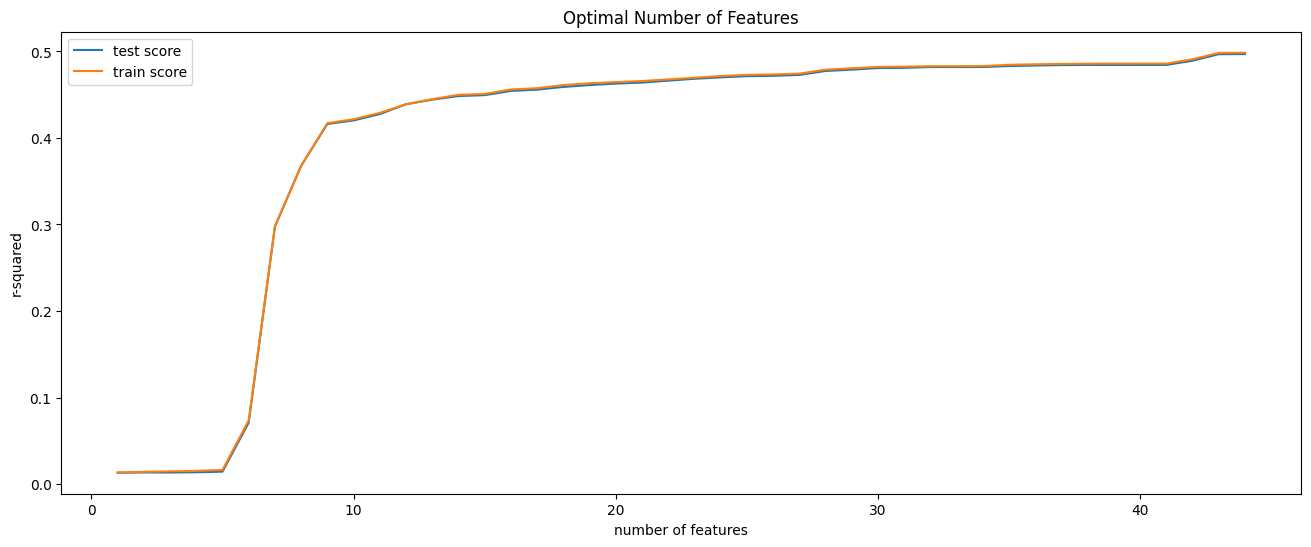

In [43]:

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_r2["param_n_features_to_select"], cv_results_r2["mean_test_score"])
plt.plot(cv_results_r2["param_n_features_to_select"], cv_results_r2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [44]:
model_cv_mse.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [45]:
cv_results_mse = pd.DataFrame(model_cv_mse.cv_results_)
cv_results_mse

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.307514,0.529655,0.004948,0.002394,1,{'n_features_to_select': 1},-498241.498721,-519258.550792,-513849.459187,-496905.943928,-495487.969819,-504748.684489,9828.257247,44,-506259.585462,-501007.154201,-502382.700217,-506594.424160,-506968.208361,-504642.414480,2455.863465
1,2.281699,0.572467,0.008054,0.004859,2,{'n_features_to_select': 2},-497417.118564,-518870.516236,-514358.022593,-497152.148662,-495141.469455,-504587.855102,9953.833196,42,-505834.553681,-500473.103524,-502286.295450,-506421.002679,-506422.747458,-504287.540558,2451.894394
2,2.222799,0.494943,0.007361,0.002956,3,{'n_features_to_select': 3},-497372.726651,-518769.461314,-514665.286970,-496746.493211,-495646.167474,-504640.027124,9961.503809,43,-505722.738166,-500375.319966,-502112.087602,-505892.121995,-505726.355352,-503965.724616,2290.192123
3,2.010813,0.162157,0.005474,0.002126,4,{'n_features_to_select': 4},-497310.741746,-518636.966893,-514132.358199,-496635.051215,-495644.079441,-504471.839499,9844.819703,41,-505693.318579,-499819.914805,-501615.016128,-505874.892705,-505680.893115,-503736.807066,2530.725581
4,2.253135,0.419955,0.007611,0.005794,5,{'n_features_to_select': 5},-497442.256815,-518637.931020,-514133.471220,-494920.012341,-495507.890436,-504128.312366,10143.372611,40,-505309.111966,-499773.827968,-501568.974530,-503824.548019,-505356.048140,-503166.502125,2185.417371
5,2.291866,0.506807,0.008411,0.005440,6,{'n_features_to_select': 6},-495584.999118,-516733.885830,-512020.366399,-360456.554514,-493192.745018,-475597.710176,58284.401912,39,-503289.334225,-497764.664104,-499617.534282,-364038.292038,-503446.659048,-473631.296739,54839.558092
6,2.264191,0.559655,0.008366,0.004308,7,{'n_features_to_select': 7},-351387.557042,-369471.300049,-361585.392673,-353521.015454,-359998.207736,-359192.694591,6404.868493,38,-358064.808417,-361332.009027,-355938.633637,-357050.453977,-363387.896992,-359154.760410,2779.187982
7,2.157738,0.464639,0.007993,0.000371,8,{'n_features_to_select': 8},-300433.249920,-361788.777362,-302367.754544,-297127.017327,-355642.725537,-323471.904938,28890.698512,37,-302404.301782,-354522.252519,-302086.223039,-302008.131351,-355799.496899,-323364.081118,25965.454075
8,2.025203,0.224690,0.005441,0.001917,9,{'n_features_to_select': 9},-295417.784491,-306719.049891,-296718.052224,-292428.698207,-301530.945218,-298562.906006,5025.051641,36,-297143.875541,-299416.242446,-296955.072243,-296597.522292,-300633.339205,-298149.210345,1588.752103
9,2.227019,0.499533,0.005621,0.002151,10,{'n_features_to_select': 10},-293769.820491,-306719.381602,-294930.153683,-290830.330181,-296221.823760,-296494.301943,5414.359306,35,-295034.568599,-299414.384383,-294876.198215,-294496.902003,-295419.725559,-295848.355752,1807.431940


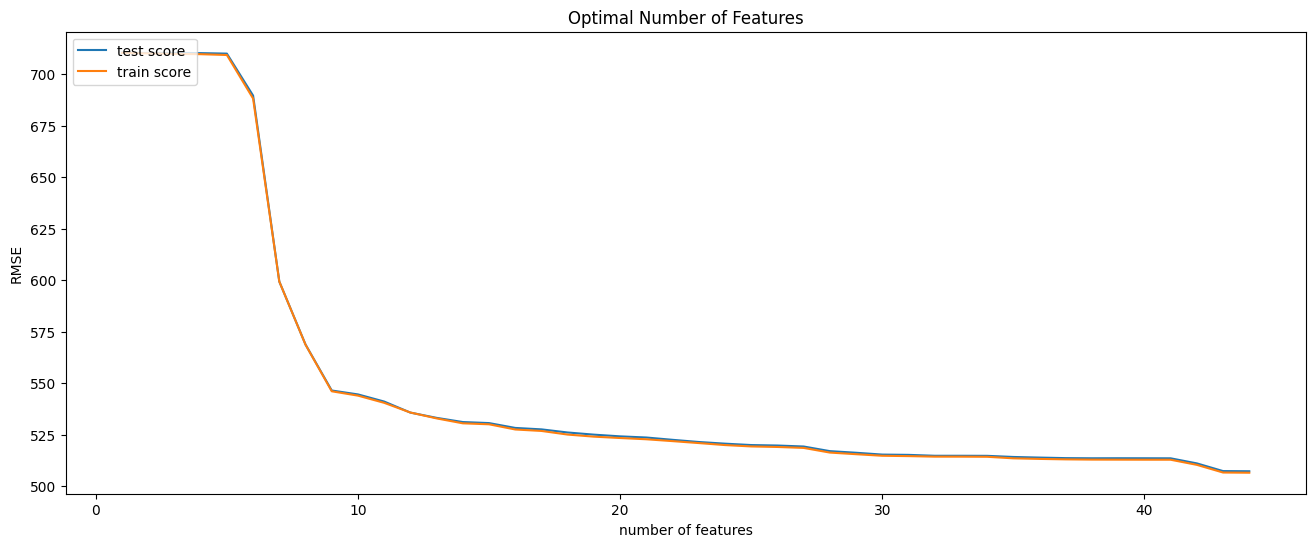

In [46]:

# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_mse["param_n_features_to_select"], np.sqrt(-cv_results_mse["mean_test_score"]))
plt.plot(cv_results_mse["param_n_features_to_select"], np.sqrt(-cv_results_mse["mean_train_score"]))
plt.xlabel('number of features')
plt.ylabel('RMSE')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [47]:
num_features = cv_results_mse["param_n_features_to_select"]
test_rmse_scores = np.sqrt(-cv_results_mse["mean_test_score"])
train_rmse_scores = np.sqrt(-cv_results_mse["mean_train_score"])
test_std_scores = cv_results_mse["std_test_score"]
train_std_scores = cv_results_mse["std_train_score"]



# Find the index of the minimum test RMSE score
optimal_num_features_index = np.argmin(test_rmse_scores)

# Get the optimal number of features
optimal_num_features = num_features[optimal_num_features_index]
optimal_test_rmse_score = test_rmse_scores[optimal_num_features_index]
optimal_train_rmse_score = train_rmse_scores[optimal_num_features_index]
optimal_test_std_score = test_std_scores[optimal_num_features_index]
optimal_train_std_score = train_std_scores[optimal_num_features_index]



print(f"Optimal number of features:{optimal_num_features} and min avg test mean rmse score : {optimal_test_rmse_score} and min avg train mean rmse score : {optimal_train_rmse_score}")
print(f"Train std:{optimal_train_std_score} and Test std: {optimal_test_std_score}")

Optimal number of features:44 and min avg test mean rmse score : 507.19546780187477 and min avg train mean rmse score : 506.48094647984703
Train std:794.2962025993249 and Test std: 3168.3560211426507


In [48]:
# final model with optimal features
n_features_optimal = 44

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)


In [49]:
selected_feature_indices = np.where(rfe.support_)[0]

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices] #Will be same as original for LR model

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['flat_type', 'nearest_mall', 'malls_within_1_km', 'malls_within_2_km',
       'year', 'month', 'region_East Region', 'region_North Region',
       'region_North-East Region', 'region_West Region', 'flat_model_3gen',
       'flat_model_adjoined_flat', 'flat_model_apartment', 'flat_model_dbss',
       'flat_model_improved', 'flat_model_maisonette', 'flat_model_model_a',
       'flat_model_model_a2', 'flat_model_model_a_maisonette',
       'flat_model_new_generation', 'flat_model_premium_apartment',
       'flat_model_premium_apartment_loft', 'flat_model_premium_maisonette',
       'flat_model_simplified', 'flat_model_standard', 'flat_model_terrace',
       'flat_model_type_s1_s2', 'subzone_encoded', 'planning_area_encoded',
       'floor_area_sqm', 'property_age', 'nearest_mrt_exist',
       'nearest_mrt_planned', 'nearest_school', 'mrt_within_0.5_km',
       'mrt_within_1_km', 'school_within_1_km', 'school_within_2_km',
       'mean_coe', 'max_coe', 'min_coe', 

In [50]:
#Final model we cross check for overfitting so we again split data  Train val test, val for overfitting check
y_train = df_train['monthly_rent']
X_train  = df_train.drop(columns=['monthly_rent'])
y_val = df_val['monthly_rent']
X_val  = df_val.drop(columns=['monthly_rent'])
X_test = df_test


In [51]:
model = LinearRegression()
model.fit(X_train[selected_features], y_train)

# Get the coefficients of the selected features
feature_coefficients = model.coef_ #Different for tree based models



feature_coefficients_df = pd.DataFrame(list(zip(selected_features, feature_coefficients)), columns=['Feature', 'Coefficient'])

feature_coefficients_df['AbsoluteCoefficient'] = abs(feature_coefficients_df['Coefficient'])
sorted_features_df = feature_coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False).reset_index(drop=True)

# Assign ranks to the sorted features
sorted_features_df['Rank'] = sorted_features_df.index + 1

# Print the DataFrame
print("Selected Features and Coefficients:")
sorted_features_df

Selected Features and Coefficients:


,Feature,Coefficient,AbsoluteCoefficient,Rank
0,flat_model_terrace,736.458868,736.458868,1
1,flat_model_premium_maisonette,468.917664,468.917664,2
2,flat_model_premium_apartment_loft,411.726546,411.726546,3
3,flat_type,366.304380,366.304380,4
4,flat_model_dbss,354.795600,354.795600,5
5,flat_model_apartment,-317.387749,317.387749,6
6,flat_model_model_a_maisonette,314.809756,314.809756,7
7,flat_model_type_s1_s2,310.544328,310.544328,8
8,last_month_mean,236.783937,236.783937,9
9,region_West Region,-233.900268,233.900268,10


In [52]:
from sklearn.metrics import r2_score

In [53]:
# Calculate MSE on the training set
train_predictions = model.predict(X_train[selected_features])
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse_all_features)
train_r2_score = r2_score(y_train, train_predictions)


#MSE on the validation set
val_predictions = model.predict(X_val[selected_features])
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)


In [54]:
train_rmse, val_rmse, train_r2_score

(507.2010868223506, 504.2028152412662, 0.49874745656680086)

In [55]:
# Calculate MSE on the test set (Kaggle data)
predictions = model.predict(X_test[selected_features])

In [56]:
rounded_predictions = np.round(predictions / 10) * 10 #nearest 10 value

In [57]:
import os
fp = os.getcwd() + "./data/submission_lm_optimal_rounded.csv"

In [58]:
num_predictions = len(rounded_predictions)

# Generate unique IDs starting from 0
ids = list(range(num_predictions))


submission_df = pd.DataFrame({'Id': ids, 'Predicted': rounded_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv(fp, index=False)